In [70]:
import re
import collections
from scipy.spatial import distance

# Задание 1

In [9]:
texts = []
with open ('./_3a8d746cf4d86fba2f31586f239d11fd_sentences.txt') as file:
    for line in file:
        texts.append(line.lower())
texts = [text.rstrip() for text in texts]

['in comparison to dogs, cats have not undergone major changes during the domestication process.', 'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.', 'a common interactive use of cat for a single file is to output the content of a file to standard output.', 'cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.', 'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.', 'the domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.', 'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).', 'however, if the output is piped or redirected, cat is unnecessary.', 'cat with one named file is safer where human error is a conc

In [19]:
token_texts = []
for i in texts:
    t = re.split('[^a-z]', i)
    t = [x for x in t if x]
    token_texts.append(t)
print(token_texts)

[['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process'], ['as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'to', 'concatenate', 'binary', 'files', 'where', 'it', 'will', 'just', 'concatenate', 'sequence', 'of', 'bytes'], ['a', 'common', 'interactive', 'use', 'of', 'cat', 'for', 'a', 'single', 'file', 'is', 'to', 'output', 'the', 'content', 'of', 'a', 'file', 'to', 'standard', 'output'], ['cats', 'can', 'hear', 'sounds', 'too', 'faint', 'or', 'too', 'high', 'in', 'frequency', 'for', 'human', 'ears', 'such', 'as', 'those', 'made', 'by', 'mice', 'and', 'other', 'small', 'animals'], ['in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin'], ['the', 'domesticated', 'cat', 'and', 'its', 'closest', 'wild', 'ancestor', 'are', 'both', 'diploid', 'organism

In [21]:
full = []
for i in token_texts:
    full += i
print(full)
print(len(full))

['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process', 'as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'to', 'concatenate', 'binary', 'files', 'where', 'it', 'will', 'just', 'concatenate', 'sequence', 'of', 'bytes', 'a', 'common', 'interactive', 'use', 'of', 'cat', 'for', 'a', 'single', 'file', 'is', 'to', 'output', 'the', 'content', 'of', 'a', 'file', 'to', 'standard', 'output', 'cats', 'can', 'hear', 'sounds', 'too', 'faint', 'or', 'too', 'high', 'in', 'frequency', 'for', 'human', 'ears', 'such', 'as', 'those', 'made', 'by', 'mice', 'and', 'other', 'small', 'animals', 'in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin', 'the', 'domesticated', 'cat', 'and', 'its', 'closest', 'wild', 'ancestor', 'are', 'both', 'diploid', 'organisms', 'that',

In [26]:
counter = collections.Counter(full)
print(counter)
print(len(counter))

Counter({'the': 20, 'of': 19, 'to': 14, 'and': 14, 'a': 13, 'in': 11, 'cat': 10, 'x': 9, 'apple': 8, 'os': 8, 'is': 7, 'as': 6, 'mac': 6, 'file': 5, 'on': 5, 'you': 5, 'mountain': 5, 'cats': 4, 'it': 4, 'for': 4, 'one': 4, 'has': 4, 'leopard': 4, 'lion': 4, 'can': 3, 'be': 3, 'just': 3, 'output': 3, 'or': 3, 'by': 3, 'command': 3, 'using': 3, 'released': 3, 'tiger': 3, 'computers': 3, 'have': 2, 'major': 2, 'changes': 2, 'process': 2, 'simply': 2, 'bytes': 2, 'also': 2, 'concatenate': 2, 'where': 2, 'will': 2, 'sequence': 2, 'use': 2, 'content': 2, 'too': 2, 'human': 2, 'such': 2, 'other': 2, 'small': 2, 'were': 2, 'its': 2, 'are': 2, 'that': 2, 'redirected': 2, 'with': 2, 'redirection': 2, 'commands': 2, 'when': 2, 'stdin': 2, 'new': 2, 'was': 2, 'contains': 2, 'over': 2, 'installed': 2, 'installation': 2, 's': 2, 'releasing': 2, 'versions': 2, 'an': 2, 'than': 2, 'comparison': 1, 'dogs': 1, 'not': 1, 'undergone': 1, 'during': 1, 'domestication': 1, 'catenates': 1, 'streams': 1, 'used

In [63]:
dictionary = list(dict(counter).keys())
A = np.zeros((len(token_texts), len(dictionary)))
for i in range(len(token_texts)):
    count = collections.Counter(token_texts[i])
    for j in range(len(dictionary)):
        A[i,j] = count[dictionary[j]]

In [100]:
dist = [[] for i in range(len(token_texts)-1)]
for i in range(1, len(token_texts)):
    dist[i-1].append(distance.cosine(A[0], A[i]))
    dist[i-1].append(i)
    
k = sorted(dist)[:2]
l = str(k[0][1]) + ' ' + str(k[1][1])
print(l)

6 4


In [101]:
with open('file.txt', 'w') as file:
    file.write(l)

# Задание 2

[ 4.12454868 -0.87233182]
[ 3.57839130e+00 -3.29714150e-01  3.53971617e-03]
[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


<function matplotlib.pyplot.show(*args, **kw)>

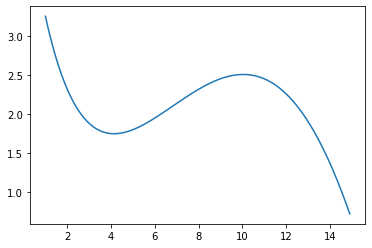

In [331]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg


def f(x):
    return np.sin(x/5.) * np.exp(x/10.) + 5. * np.exp(-x/2.)
A = np.array([[1,1], [1,4]])
b = [f(1),f(15)]
z = np.linalg.solve(A, b)
print (z)



def f1(x):
    return np.sin(x/5.) * np.exp(x/10.) + 5. * np.exp(-x/2.)
A = np.array([[1,1,1], [1,4,16], [1,10,100]])
b = [f(1),f(8),f(15)]
z1 = np.linalg.solve(A, b)
print (z1)



def f2(x):
    return np.sin(x/5.) * np.exp(x/10.) + 5. * np.exp(-x/2.)
A = np.array([[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 225, 3375]])
b = [f(1),f(4),f(10),f(15)]
z2 = np.linalg.solve(A, b)
print (z2)

%matplotlib inline
from matplotlib import pylab as plt
x = np.arange(1, 15, 0.1)
y = f2(x)
plt.plot (x, y)
plt.show